# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [19]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [20]:
def max_element(arr):
    # позиции нулей (кроме последней)
    zeros = np.where(arr[:-1] == 0)[0]
    # нет нулей
    if len(zeros) == 0:
        return None
    # максимальное значение в позициях после позиций нулей
    return np.max(arr[zeros + 1])

# проверка
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))
y = np.array([6, 2, 3, 5, 7])
print(max_element(y))

5
None


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [21]:
def nearest_value(X, v):
    return X.flat[np.abs(X - v).argmin()]

# проверка:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(nearest_value(X, v))

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [22]:
def scale(X):
    # средние значения
    means = np.mean(X, axis=0)
    # поиск стандартного отклонения и избегание деления на 0
    stds = np.where(np.std(X, axis=0) == 0, 1, np.std(X, axis=0))
    return (X - means) / stds

# проверка:
np.random.seed(13)
matrix = np.random.randint(0, 10, (3, 3))
print("Случайная матрица:\n", matrix)
print("\nМасштабированная случайная матрица:\n", scale(matrix))

Случайная матрица:
 [[2 0 0]
 [6 2 4]
 [9 3 4]]

Масштабированная случайная матрица:
 [[-1.27872403 -1.33630621 -1.41421356]
 [ 0.11624764  0.26726124  0.70710678]
 [ 1.16247639  1.06904497  0.70710678]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [23]:
def get_stats(X):

    # определитель для квадратных матриц
    det = np.linalg.det(X) if X.shape[0] == X.shape[1] else "Матрица не квадратная"
    # след для квадратных матриц
    trace = np.trace(X) if X.shape[0] == X.shape[1] else "Матрица не квадратная"

    # наименьший и наибольший элементы
    min_val = np.min(X)
    max_val = np.max(X)

    # норма Фробениуса
    Frobs_norm = np.linalg.norm(X, 'fro')

    # собственные числа для квадратных матриц
    eigvals = np.linalg.eigvals(X) if X.shape[0] == X.shape[1] else "Матрца не квадратная"

    # обратная матрица
    inv = np.linalg.inv(X) if X.shape[0] == X.shape[1] else "Матрица не квадратная"

    return {
        "определитель": det,
        "след": trace,
        "наименьший элемент": min_val,
        "наибольший элемент": max_val,
        "норма Фробениуса": Frobs_norm,
        "собственные числа": eigvals,
        "обратная матрица": inv}

# проверка:
np.random.seed(13)
X = np.random.normal(10, 1, (4, 4))
stats = get_stats(X)

print(f"Случайная матрица:\n {X}\n")
print("Статистики матрицы:")
print("-" * 50)


""" если в выводе нельзя использовать циклы"""
print(f'- определитель (для квадратных матриц): {stats["определитель"]:.8f}')
print(f'- след: {stats["след"]:.8f}')
print(f'- наименьший элемент: {stats["наименьший элемент"]:.8f}')
print(f'- наибольший элемент: {stats["наибольший элемент"]:.8f}')
print(f'- норма Фробениуса: {stats["норма Фробениуса"]:.8f}')
print(f'\n- собственные числа (для квадратных матриц):\n{stats["собственные числа"]}')
print(f'\n- обратная матрица (для квадратных матриц):\n{stats["обратная матрица"]}')


# """ если в выводе можно использовать циклы:"""
# for key, val in stats.items():
#     if isinstance(val, np.ndarray):
#         print(f"\n- {key}: \n{val}")
#     else:
#         print(f"- {key}: {val:.8f}")

Случайная матрица:
 [[ 9.28760934 10.75376638  9.95549692 10.45181234]
 [11.34510171 10.53233789 11.3501879  10.86121137]
 [11.47868574  8.95462287  9.21101098  8.73839405]
 [10.56284679  9.75667375 10.9137407  10.31735092]]

Статистики матрицы:
--------------------------------------------------
- определитель (для квадратных матриц): 1.38043729
- след: 39.34830912
- наименьший элемент: 8.73839405
- наибольший элемент: 11.47868574
- норма Фробениуса: 41.25725709

- собственные числа (для квадратных матриц):
[ 4.10853238e+01+0.j         -8.78675863e-01+0.93811168j
 -8.78675863e-01-0.93811168j  2.03370108e-02+0.j        ]

- обратная матрица (для квадратных матриц):
[[  0.65371274  -5.47293618   1.24686656   4.04315243]
 [ -2.57324068  21.17178118  -3.3206025  -16.86861579]
 [ -3.78216682  23.76317609  -4.22581477 -17.60525036]
 [  5.76492849 -39.55487418   6.33370155  30.53240323]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [24]:
max_values = []

for _ in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A @ B
    max_values.append(np.max(C))

print(f"Среднее значение максимумов: {np.mean(np.array(max_values)):.4f}")
print(f"95-процентная квантиль: {np.percentile(max_values, 95):.8f}")

Среднее значение максимумов: 8.2951
95-процентная квантиль: 11.89066166


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 
**Month** 1-12 
**DayofMonth** 1-31 
**DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

**Year** – 2008  
**Month** – 1-12  
**DayofMonth** – 1-31  
**DayOfWeek** – 1 (понедельник) - 7 (воскресенье)  
**DepTime** – фактическое время вылета (местное, ччмм)  
**CRSDepTime** – запланированное время вылета (местное, ччмм)  
**ArrTime** – фактическое время прибытия (местное, ччмм)  
**CRSArrTime** – запланированное время прибытия (местное, ччмм)  
**UniqueCarrier** – уникальный код перевозчика  
**FlightNum** – номер рейса  
**TailNum** – бортовой номер самолета: регистрация воздушного судна, уникальный идентификатор самолета  
**ActualElapsedTime** – в минутах  
**CRSElapsedTime** – в минутах  
**AirTime** – в минутах  
**ArrDelay** – задержка прибытия в минутах: Рейс считается "пунктуальным", если он прибыл менее чем на 15 минут позже времени, указанного в компьютерных системах бронирования перевозчиков (CRS).  
**DepDelay** – задержка вылета в минутах  
**Origin** – код аэропорта отправления (IATA)  
**Dest** – код аэропорта назначения (IATA)  
**Distance** – расстояние в милях  
**TaxiIn** – время руления после посадки в минутах  
**TaxiOut** – время руления перед взлетом в минутах  
**Cancelled** – был ли рейс отменен  
**CancellationCode** – причина отмены (A = перевозчик, B = погода, C = NAS, D = безопасность)  
**Diverted** – 1 = да, 0 = нет  
**CarrierDelay** – задержка по вине перевозчика в минутах: Задержка, находящаяся под контролем авиаперевозчика. Примеры ситуаций, которые могут привести к такой задержке: уборка салона, повреждение самолета, ожидание прибытия connecting пассажиров или экипажа, багаж, столкновение с птицами, погрузка груза, кейтеринг, компьютерный сбой оборудования перевозчика, правовые вопросы экипажа (отдых пилота или стюардессы), повреждение опасными грузами, инженерный осмотр, заправка топливом, обслуживание пассажиров с ограниченными возможностями, опоздание экипажа, обслуживание туалетов, техническое обслуживание, овербукинг, заправка питьевой водой, удаление неадекватного пассажира, медленная посадка или размещение пассажиров, размещение ручной клади, задержки из-за веса и балансировки.  

**WeatherDelay** – задержка из-за погоды в минутах: Вызвана экстремальными или опасными погодными условиями, которые были прогнозированы или проявились в точке вылета, в пути или в точке прибытия.  

**NASDelay** – задержка по вине Национальной системы воздушного пространства (NAS) в минутах: Задержки, находящиеся под контролем NAS, могут включать: неэкстремальные погодные условия, операции в аэропорту, интенсивный трафик, управление воздушным движением и т.д.  

**SecurityDelay** – задержка по соображениям безопасности в минутах: Вызвана эвакуацией терминала или сектора, повторной посадкой на самолет из-за нарушения безопасности, неработающим оборудованием досмотра и/или длинными очередями (более 29 минут) в зонах досмотра.  

**LateAircraftDelay** – задержка прибытия в аэропорт из-за позднего прибытия того же самолета в предыдущем аэропорту в минутах: Эффект домино от более ранней задержки в последующих аэропортах называется распространением задержки.

In [25]:
# загрузка библиотеки и данных
import pandas as pd

df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [26]:
# подсчет частот кодов отмены
CancellationCode = df['CancellationCode'].value_counts()

# расшифровка кодов
codes = {
    'A': 'Carrier',
    'B': 'Weather', 
    'C': 'NAS',
    'D': 'Security'}

freq_df = pd.DataFrame({
    'Код': CancellationCode.index,
    'Количество': CancellationCode.values,
    ' Причина': CancellationCode.index.map(codes)})

print("Частоты CancellationCode:\n")
print(freq_df.to_string(index=False))

# самая частая причина и количество
code_most = CancellationCode.idxmax()
code_count = CancellationCode.max()

print(f'\nСамая частая причина отмены: код "{code_most}" - {codes[code_most]}, ({code_count} рейса)')

Частоты CancellationCode:

Код  Количество  Причина
  A         563  Carrier
  B         549  Weather
  C         299      NAS

Самая частая причина отмены: код "A" - Carrier, (563 рейса)


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [27]:
print("Расстояния, пройденные самолетом (в милях):")
print(f"Среднее: {df['Distance'].mean():.4f}")
print(f"Минимальное: {df['Distance'].min()}")
print(f"Максимальное: {df['Distance'].max()}")

Расстояния, пройденные самолетом (в милях):
Среднее: 724.5083
Минимальное: 31
Максимальное: 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [28]:
min_distance = df['Distance'].min()
print(f"Минимальное расстояние: {min_distance} миля\n")

# Все рейсы с минимальным расстоянием
min_distance_flights = df[df['Distance'] == min_distance]
print(f"Количество рейсов с минимальным расстоянием: {len(min_distance_flights)}")

# Находим уникальные рейсы
unique_flights = min_distance_flights[['UniqueCarrier', 'FlightNum']].drop_duplicates()
print(f"Уникальных рейсов: {len(unique_flights)}")

# Таблица всех рейсов с минимальным расстоянием
print("-" * 78)
print(min_distance_flights[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']])
print("-" * 78)

# Анализ каждого уникального рейса
for i, (_, flight_info) in enumerate(unique_flights.iterrows(), 1):
    carrier, flight_num = flight_info['UniqueCarrier'], flight_info['FlightNum']
    
    # Находим тот же рейс в другие дни
    other_days = df[(df['UniqueCarrier'] == carrier) & 
                    (df['FlightNum'] == flight_num) & 
                    (df['Distance'] != min_distance)]
    
    if not other_days.empty:
        print(f"\n{'='*78}")
        print(f"Рейс {carrier}-{flight_num} в другие дни ({len(other_days)} записей):")
        print("-" * 78)
        print(other_days[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']])
        print("-" * 78)
        
        print(f"\nСтатистика расстояний:")
        print(f" Среднее: {other_days['Distance'].mean():.4f}")
        print(f" Минимальное: {other_days['Distance'].min()}")
        print(f" Максимальное: {other_days['Distance'].max()}")

Минимальное расстояние: 31 миля

Количество рейсов с минимальным расстоянием: 6
Уникальных рейсов: 2
------------------------------------------------------------------------------
       Year  Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116   2008     12          30            AS         65    WRG  PSG        31
6958   2008     12          26            AS         65    WRG  PSG        31
17349  2008      8          18            AS         64    PSG  WRG        31
27534  2008      3          11            AS         64    PSG  WRG        31
46082  2008      8           9            AS         65    WRG  PSG        31
48112  2008      2          28            AS         64    PSG  WRG        31
------------------------------------------------------------------------------

Рейс AS-65 в другие дни (13 записей):
------------------------------------------------------------------------------
       Year  Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [29]:
departure_counts = df['Origin'].value_counts()
airport_most = departure_counts.idxmax()
airport_count = departure_counts.max()

print(f"Аэропорт с наибольшим числом вылетов: {airport_most} - {airport_count} вылета")
print("\n(информации о городах нет в предоставленных данных, но судя по указанному \nкоду - это Международный аэропорт Хартсфилд-Джексон Атланта,\nнаходящийся в Атланте (Джорджия,США))")

Аэропорт с наибольшим числом вылетов: ATL - 4134 вылета

(информации о городах нет в предоставленных данных, но судя по указанному 
коду - это Международный аэропорт Хартсфилд-Джексон Атланта,
находящийся в Атланте (Джорджия,США))


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [30]:
# группировка по аэропорту вылета и среднее AirTime
mean_airtime = df.groupby('Origin')['AirTime'].mean().dropna()
top_airport_airtime = mean_airtime.idxmax()
top_mean_airtime = mean_airtime.max()

# для форматированного вывода
top_5_df = pd.DataFrame({
    ' Аэропорт': mean_airtime.sort_values(ascending=False).head().index,
    'Среднее время': mean_airtime.sort_values(ascending=False).head().values.round(2)})

print("Топ-5 аэропортов по среднему времени полета:")
print("-" * 25)
print(top_5_df.to_string(index=False))
print("-" * 25)
print(f"Аэропорт с наибольшим средним временем полета: {top_airport_airtime} - {top_mean_airtime:.2f} минут")

Топ-5 аэропортов по среднему времени полета:
-------------------------
 Аэропорт  Среднее время
      SJU         205.20
      BQN         193.95
      PSE         191.88
      STT         185.03
      ANC         165.42
-------------------------
Аэропорт с наибольшим средним временем полета: SJU - 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [31]:
# признак задержки вылета
df['DepDelayed'] = df['DepDelay'] > 0

# группировка и фильтр
origin_stats = df.groupby('Origin').filter(lambda group: len(group) >= 1000)
result = origin_stats.groupby('Origin').agg(
    total_flights=('DepDelay', 'size'),
    delayed_flights=('DepDelayed', 'sum'))

# доля задержек
result['delay_ratio'] = result['delayed_flights'] / result['total_flights']

# аэропорт с максимальной долей
top_delay_airport = result['delay_ratio'].idxmax()
top_delay_ratio = result['delay_ratio'].max()
top_total_flights = result.loc[top_delay_airport, 'total_flights']
top_delayed_flights = result.loc[top_delay_airport, 'delayed_flights']

print(f"Всего аэропортов с не менее 1000 вылетов: {len(result)}")
print(f"Аэропорт с наибольшей долей задержанных рейсов:\n {top_delay_airport}: {top_delay_ratio:.2%} ({top_delayed_flights}/{top_total_flights})")

Всего аэропортов с не менее 1000 вылетов: 21
Аэропорт с наибольшей долей задержанных рейсов:
 EWR: 51.12% (710/1389)


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [1]:
# загрузка библиотек и данных
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('2008.csv')

In [3]:
print(f"Есть ли пропуски в данных\n - {'Да' if df.isnull().any().any() else 'Нет'}")
print(f"Всего пропущенных ячеек\n - {df.isnull().sum().sum()}")
print(f"Объектов с хотя бы одним пропуском\n - {df.isnull().any(axis=1).sum()}")
print(f"Признаков с хотя бы одним пропуском\n - {df.isnull().any(axis=0).sum()}")

Есть ли пропуски в данных
 - Да
Всего пропущенных ячеек
 - 355215
Объектов с хотя бы одним пропуском
 - 70000
Признаков с хотя бы одним пропуском
 - 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [4]:
# пропуски в DepDelay
missing_depdelay = df[df['DepDelay'].isnull()]

if not missing_depdelay.empty:
    print(f"Статус рейсов с пропущенным DepDelay (5/{len(missing_depdelay)}):")
    print("-" * 35)
    print(missing_depdelay[['DepDelay', 'Cancelled', 'Diverted']].head())
    print("-" * 35)
    print(f" Доля 'Cancelled = 1': {missing_depdelay['Cancelled'].mean():.2%}\n")

# нулевые элементы в DepDelay
zero_depdelay = df[df['DepDelay'] == 0]

if not zero_depdelay.empty:
    print(f"Статус рейсов с DepDelay = 0 (5/{len(zero_depdelay)}):")
    print("-" * 35)
    print(zero_depdelay[['DepDelay', 'Cancelled', 'Diverted']].head())
    print("-" * 35)
    print(f" Доля 'Cancelled = 1': {zero_depdelay['Cancelled'].mean():.2%}")


print("\n" + "=" * 38)
print("Признаки для исключения:")
print("  - Cancelled (пропуски в DepDelay)")
print("  - Diverted (особые случаи рейсов)")
print("=" * 38 + "\n")

# удаление строк с пропущенным DepDelay и исключение признаков Cancelled и Diverted 
df_clean = df.dropna(subset=['DepDelay']).query('DepDelay != 0').drop(['Cancelled', 'Diverted', 'CancellationCode'], axis=1).copy()

# отделение целевой переменной
y = df_clean['DepDelay'].copy()
X = df_clean.drop(['DepDelay'], axis=1)


print(f"Размеры до исключения: \n X:{df.shape}")
print(f"Размеры после исключения: \n X:{X.shape}, y:{y.shape}\n")

Статус рейсов с пропущенным DepDelay (5/1399):
-----------------------------------
     DepDelay  Cancelled  Diverted
11        NaN          1         0
78        NaN          1         0
103       NaN          1         0
112       NaN          1         0
128       NaN          1         0
-----------------------------------
 Доля 'Cancelled = 1': 100.00%

Статус рейсов с DepDelay = 0 (5/5197):
-----------------------------------
    DepDelay  Cancelled  Diverted
28       0.0          0         0
31       0.0          0         0
34       0.0          0         0
70       0.0          0         0
71       0.0          0         0
-----------------------------------
 Доля 'Cancelled = 1': 0.00%

Признаки для исключения:
  - Cancelled (пропуски в DepDelay)
  - Diverted (особые случаи рейсов)

Размеры до исключения: 
 X:(70000, 29)
Размеры после исключения: 
 X:(63404, 25), y:(63404,)



**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [5]:
# исходные столбцы
time_cols = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

# создание пар новых признаков и исключение исходного
for col in time_cols:
    if col in X.columns:
        # часы
        X[f'{col}_Hour'] = X[col].apply(
            lambda x: x // 100 if pd.notna(x) else np.nan  # обработка пропусков
        ).astype('float')
        # минуты
        X[f'{col}_Minute'] = X[col].apply(
            lambda x: x % 100 if pd.notna(x) else np.nan   # обработка пропусков
        ).astype('float')
        # исключение
        X = X.drop(col, axis=1)

# список новых признаков
new_features = X.columns[X.columns.str.contains('Hour|Minute')].tolist()
print("Новые признаки:")
print("\n --> ".join([""] + new_features))

Новые признаки:

 --> DepTime_Hour
 --> DepTime_Minute
 --> CRSDepTime_Hour
 --> CRSDepTime_Minute
 --> ArrTime_Hour
 --> ArrTime_Minute
 --> CRSArrTime_Hour
 --> CRSArrTime_Minute


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [6]:
# исключение TailNum и Year
X = X.drop(['TailNum', 'Year'], axis=1, errors='ignore')

# признаки, сильно коррелирующие с целевой переменной    
strong_corr_features = [
    #  data leakage - фактическое время вылета/прибытия,задержка прибытия (известно только после вылета/посадки/полета)
    'DepTime_Hour',
    'DepTime_Minute',
    'ArrTime_Hour',      
    'ArrTime_Minute',
    'ArrDelay',
    'AirTime',
    'ActualElapsedTime', # фактически вычисляется через целевую переменную
    
    # причины задержки известны только после её возникновения
    'CarrierDelay',       
    'WeatherDelay',
    'NASDelay',           
    'SecurityDelay',
    'LateAircraftDelay']

# исключение признаков
for f in strong_corr_features:
    if f in X.columns:
        X = X.drop(f, axis=1)
        print(f"Исключен признак: {f}")

remaining_features = X.columns.tolist()
print(f"\nОставшиеся признаки ({X.shape[1]}):")
print("\n --> ".join([""] + remaining_features))

Исключен признак: DepTime_Hour
Исключен признак: DepTime_Minute
Исключен признак: ArrTime_Hour
Исключен признак: ArrTime_Minute
Исключен признак: ArrDelay
Исключен признак: AirTime
Исключен признак: ActualElapsedTime
Исключен признак: CarrierDelay
Исключен признак: WeatherDelay
Исключен признак: NASDelay
Исключен признак: SecurityDelay
Исключен признак: LateAircraftDelay

Оставшиеся признаки (15):

 --> Month
 --> DayofMonth
 --> DayOfWeek
 --> UniqueCarrier
 --> FlightNum
 --> CRSElapsedTime
 --> Origin
 --> Dest
 --> Distance
 --> TaxiIn
 --> TaxiOut
 --> CRSDepTime_Hour
 --> CRSDepTime_Minute
 --> CRSArrTime_Hour
 --> CRSArrTime_Minute


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

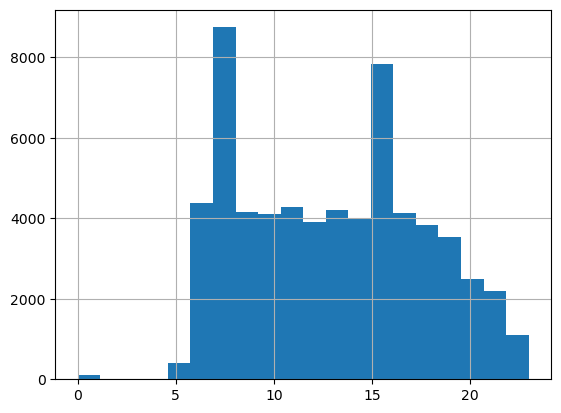

In [7]:
X['CRSDepTime_Hour'].hist(bins=20)

<Axes: >

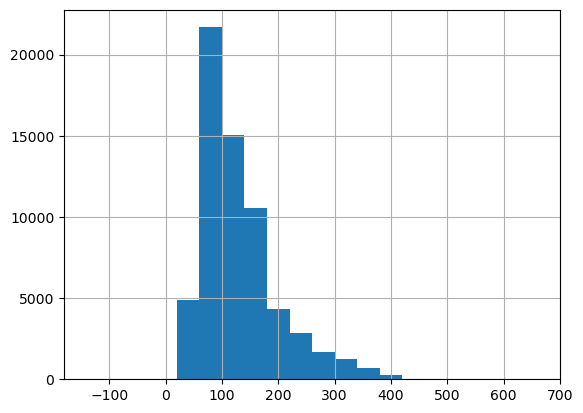

In [8]:
X['CRSElapsedTime'].hist(bins=20)

<Axes: >

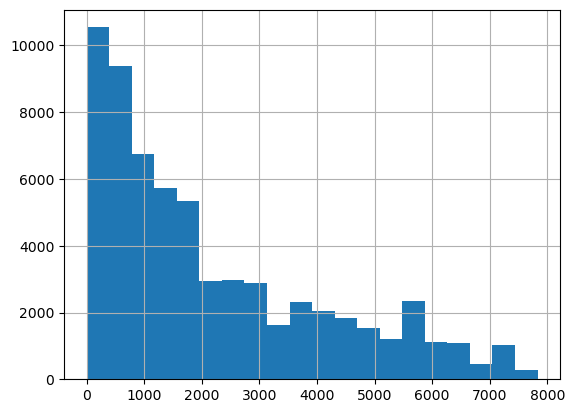

In [9]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
def transform_data(data):

    # определение типа признаков
    numerical_cols = data.select_dtypes(include = [np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include = ['object']).columns.tolist()
   
    # обработка пропусков
    data_filled = data.copy()
    data_filled[numerical_cols] = data_filled[numerical_cols].fillna(0)
    data_filled[categorical_cols] = data_filled[categorical_cols].fillna('nan')
    
    # масштабирование для вещественных признаков
    scaler = StandardScaler()
    numerical_scaled = scaler.fit_transform(data_filled[numerical_cols])
    df_scaled = pd.DataFrame(numerical_scaled, columns = numerical_cols, index = data.index)
    
    # one-hot-кодирование для категориальных признаков
    if categorical_cols:
        dummies = pd.get_dummies(data_filled[categorical_cols], prefix = categorical_cols)
        final_df = pd.concat([df_scaled, dummies], axis = 1)
    else:
        final_df = df_scaled
    
    return final_df

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [12]:
X_transformed = transform_data(X)
print(f"Признаков после преобразования: {X_transformed.shape[1]}")

Признаков после преобразования: 626


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 56)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Обучающий вектор целевой переменной: {y_train.shape}")
print("-" * 45)
print(f"Контрольная выборка: {X_test.shape}")
print(f"Контрольный вектор целевой переменной: {y_test.shape}")

Обучающая выборка: (44382, 626)
Обучающий вектор целевой переменной: (44382,)
---------------------------------------------
Контрольная выборка: (19022, 626)
Контрольный вектор целевой переменной: (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [14]:
# подготовка данных
X_train_1000 = X_train.iloc[:1000]
y_train_1000 = y_train.iloc[:1000]

print(f"Размер выборки: {X_train_1000.shape[0]} объектов, {X_train_1000.shape[1]} признаков")

# обучение LinearRegression
lr = LinearRegression()
lr.fit(X_train_1000, y_train_1000)

# прогнозирование
y_pred_train_lr = lr.predict(X_train_1000)
y_pred_test_lr = lr.predict(X_test)

# метрики
mse_train_lr = mean_squared_error(y_train_1000, y_pred_train_lr)
r2_train_lr = r2_score(y_train_1000, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print("\nМетрики LinearRegression:")
print("-" * 70)
print(f" -Обучающая выборка:\n   MSE = {mse_train_lr:8.2f},  R² = {r2_train_lr:8.4f}")
print(f" -Контрольная выборка:\n   MSE = {mse_test_lr:8.2f},  R² = {r2_test_lr:8.4f}")
print(f"\n -Разница R² (train-test): {r2_train_lr - r2_test_lr:.4f}")
print("-" * 70)

# анализ коэффициентов
coefs_lr = lr.coef_
threshold = 0.001  # степень близости к 0

print("\nАнализ коэффициентов LinearRegression (coef_):")
print("-" * 70)
print(f"Всего коэффициентов: {len(coefs_lr)}")
print(f" -Коэффициентов < {threshold}: {np.sum(np.abs(coefs_lr) < threshold)}")
print(f" -Максимальный: {np.max(np.abs(coefs_lr)):.4f}")
print(f" -Среднее: {np.mean(np.abs(coefs_lr)):.4f}")
print("-" * 70)

# вывод
print("\nВывод:")
print("  - Переобучение из-за большого количества признаков на малой выборке")
print("=" * 70)

Размер выборки: 1000 объектов, 626 признаков

Метрики LinearRegression:
----------------------------------------------------------------------
 -Обучающая выборка:
   MSE =   942.47,  R² =   0.3565
 -Контрольная выборка:
   MSE =  1666.82,  R² =  -0.3363

 -Разница R² (train-test): 0.6928
----------------------------------------------------------------------

Анализ коэффициентов LinearRegression (coef_):
----------------------------------------------------------------------
Всего коэффициентов: 626
 -Коэффициентов < 0.001: 280
 -Максимальный: 116.1569
 -Среднее: 9.0148
----------------------------------------------------------------------

Вывод:
  - Переобучение из-за большого количества признаков на малой выборке


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (1 балл)** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?


Анализ коэффициентов, близких к 0
  (|coef| < 0.001, alpha = default):
------------------------------------
LinearRegression: 280 / 626
Ridge: 280 / 626
Lasso: 619 / 626
Lasso (coef = 0): 619



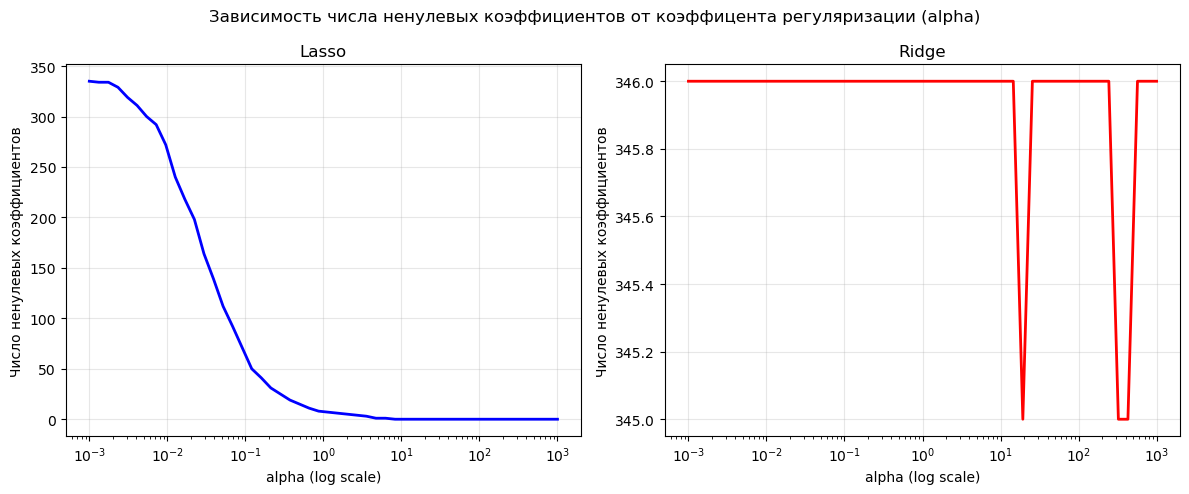


Вывод:
- В Lasso с увеличением alpha число ненулевых коэффициентов уменьшается
- Ridge не обнуляет коэффициенты, а только уменьшает их величину


In [15]:
# модели
ridge_default = Ridge()
lasso_default = Lasso(max_iter=10000)

ridge_default.fit(X_train_1000, y_train_1000)
lasso_default.fit(X_train_1000, y_train_1000)

# анализ коэффициентов (близких к 0)
print("\nАнализ коэффициентов, близких к 0\n  (|coef| < 0.001, alpha = default):")
print("-" * 36)
print(f"LinearRegression: {np.sum(np.abs(lr.coef_) < 0.001)} / {len(lr.coef_)}")
print(f"Ridge: {np.sum(np.abs(ridge_default.coef_) < 0.001)} / {len(ridge_default.coef_)}")
print(f"Lasso: {np.sum(np.abs(lasso_default.coef_) < 0.001)} / {len(lasso_default.coef_)}")
print(f"Lasso (coef = 0): {np.sum(lasso_default.coef_ == 0)}\n")

# вычисления для графика зависимости числа ненулевых коэффициентов от alpha
alphas = np.logspace(-3, 3, 50)
non_zero_lasso = []
non_zero_ridge = []

for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    lasso_temp.fit(X_train_1000, y_train_1000)
    non_zero_lasso.append(np.sum(lasso_temp.coef_ != 0))
    
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_1000, y_train_1000)
    non_zero_ridge.append(np.sum(np.abs(ridge_temp.coef_) > 1e-4))

# Построение графика
plt.figure(figsize=(12, 5))
plt.suptitle("Зависимость числа ненулевых коэффициентов от коэффицента регуляризации (alpha)", fontsize=12)

plt.subplot(1, 2, 1)
plt.semilogx(alphas, non_zero_lasso, 'b-', linewidth=2)
plt.xlabel('alpha (log scale)')
plt.ylabel('Число ненулевых коэффициентов')
plt.title('Lasso')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, non_zero_ridge, 'r-', linewidth=2)
plt.xlabel('alpha (log scale)')
plt.ylabel('Число ненулевых коэффициентов')
plt.title('Ridge')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nВывод:")
print("- В Lasso с увеличением alpha число ненулевых коэффициентов уменьшается")
print("- Ridge не обнуляет коэффициенты, а только уменьшает их величину")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [16]:
# alpha = default

# метрики на обучающей выборке
y_pred_ridge_train = ridge_default.predict(X_train_1000)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train_1000, y_pred_ridge_train))
mae_ridge_train = mean_absolute_error(y_train_1000, y_pred_ridge_train)
r2_ridge_train = r2_score(y_train_1000, y_pred_ridge_train)

# метрики на тестовой выборке
y_pred_ridge_test = ridge_default.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)
r2_ridge = r2_score(y_test, y_pred_ridge_test)

# результаты
print(f"{'Метрика':<10} {'Обучающая выборка':<20} {'Тестовая выборка':<20} {'Разница'}")
print("-" * 60)
print(f"{' RMSE':<14} {rmse_ridge_train:6.2f} {rmse_ridge:20.2f} {rmse_ridge - rmse_ridge_train:16.2f}")
print(f"{' MAE':<14} {mae_ridge_train:6.2f} {mae_ridge:20.2f} {mae_ridge - mae_ridge_train:16.2f}")
print(f"{' R²':<14} {r2_ridge_train:6.4f} {r2_ridge:20.4f} {r2_ridge - r2_ridge_train:16.4f}")
print("-" * 60)

Метрика    Обучающая выборка    Тестовая выборка     Разница
------------------------------------------------------------
 RMSE           31.45                37.88             6.44
 MAE            18.06                22.99             4.94
 R²            0.3247              -0.1507          -0.4754
------------------------------------------------------------


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


Результаты GridSearchCV (5 фолдов):
-----------------------------------
MSE: alpha=1000.0000, MSE=1430.83
MAE: alpha=1000.0000, MAE=20.92
R²:  alpha=1000.0000, R²=0.0157



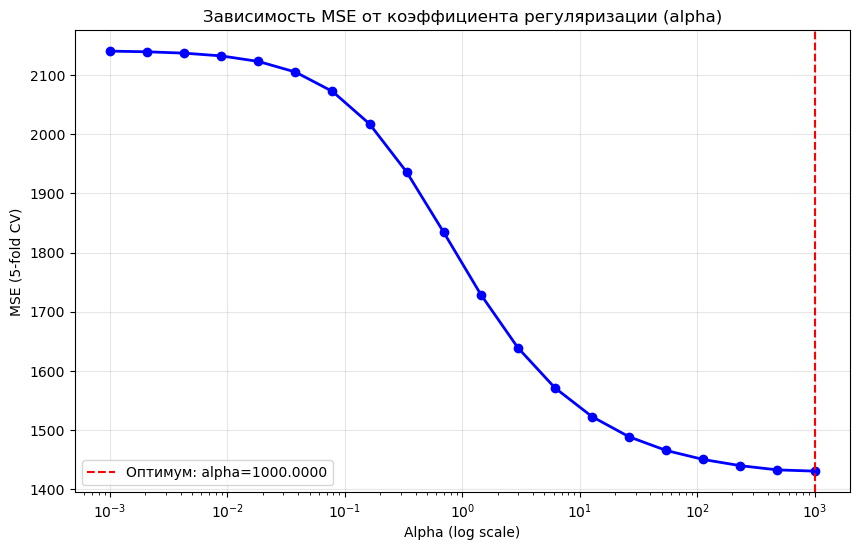


Сравнение моделей Ridge:
 Метрика   alpha = default    alpha = оптимум    Изменение 
------------------------------------------------------------
   RMSE       37.88                34.82            -3.06
   MAE        22.99                19.96            -3.04
   R²       -0.1507               0.0279           0.1786
- LinearRegression R² test:    -0.3363
- Ridge(оптимальный) R² test:   0.0279
Переобучение уменьшилось на     0.3642 по R²

Вывод: подбор alpha через GridSearchCV улучшил качество модели


In [17]:
# сетка параметров
param_grid = {'alpha': np.logspace(-3, 3, 20)}
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# подбор для разных метрик
metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
best_alphas = {}
best_scores = {}

print("\nРезультаты GridSearchCV (5 фолдов):")
print("-" * 35)

for metric in metrics:
    scoring = metric
    
    grid_search = GridSearchCV(
        Ridge(),
        param_grid,
        cv=kf,
        scoring=scoring,
        n_jobs=-1)
    
    grid_search.fit(X_train_1000, y_train_1000)
    
    best_alphas[metric] = grid_search.best_params_['alpha']
    best_scores[metric] = grid_search.best_score_
    
    # положительные значения для MSE и MAE
    if metric == 'neg_mean_squared_error':
        actual_score = -grid_search.best_score_
        print(f"MSE: alpha={best_alphas[metric]:.4f}, MSE={actual_score:.2f}")
    elif metric == 'neg_mean_absolute_error':
        actual_score = -grid_search.best_score_
        print(f"MAE: alpha={best_alphas[metric]:.4f}, MAE={actual_score:.2f}")
    else:
        print(f"R²:  alpha={best_alphas[metric]:.4f}, R²={grid_search.best_score_:.4f}\n")


# результаты GridSearchCV для MSE
grid_mse = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_mse.fit(X_train_1000, y_train_1000)

# результаты кросс-валидации
cv_results = grid_mse.cv_results_
mean_test_scores = -cv_results['mean_test_score']  # преобразуем в положительные MSE
alphas = cv_results['param_alpha'].data

# график
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mean_test_scores, 'b-', linewidth=2, marker='o')
plt.axvline(x=best_alphas['neg_mean_squared_error'], color='r', linestyle='--', 
            label=f'Оптимум: alpha={best_alphas["neg_mean_squared_error"]:.4f}')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE (5-fold CV)')
plt.title('Зависимость MSE от коэффициента регуляризации (alpha)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# оценка лучшей модели на тестовой выборке
best_alpha = best_alphas['neg_mean_squared_error']  # alpha по MSE
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_1000, y_train_1000)

y_pred_ridge_best = ridge_best.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_ridge_best))
mae_best = mean_absolute_error(y_test, y_pred_ridge_best)
r2_best = r2_score(y_test, y_pred_ridge_best)

# выводы
print("\nСравнение моделей Ridge:")
print("=" * 60)
print(f"{' Метрика':<10} {'alpha = default':<18} {'alpha = оптимум':<18} {'Изменение':<10}")
print("-" * 60)
print(f"{'   RMSE':<10} {rmse_ridge:8.2f} {rmse_best:20.2f} {rmse_best-rmse_ridge:16.2f}")
print(f"{'   MAE':<10} {mae_ridge:8.2f} {mae_best:20.2f} {mae_best-mae_ridge:16.2f}")
print(f"{'   R²':<10} {r2_ridge:8.4f} {r2_best:20.4f} {r2_best-r2_ridge:16.4f}")
print("=" * 60)

print(f"- LinearRegression R² test: {r2_test_lr:10.4f}")
print(f"- Ridge(оптимальный) R² test: {r2_best:8.4f}")
print(f"Переобучение уменьшилось на {r2_best - r2_test_lr:10.4f} по R²")

if r2_best > r2_ridge:
    print("\nВывод: подбор alpha через GridSearchCV улучшил качество модели")
else:
    print("\nВывод: подбор alpha не дал значительного улучшения")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

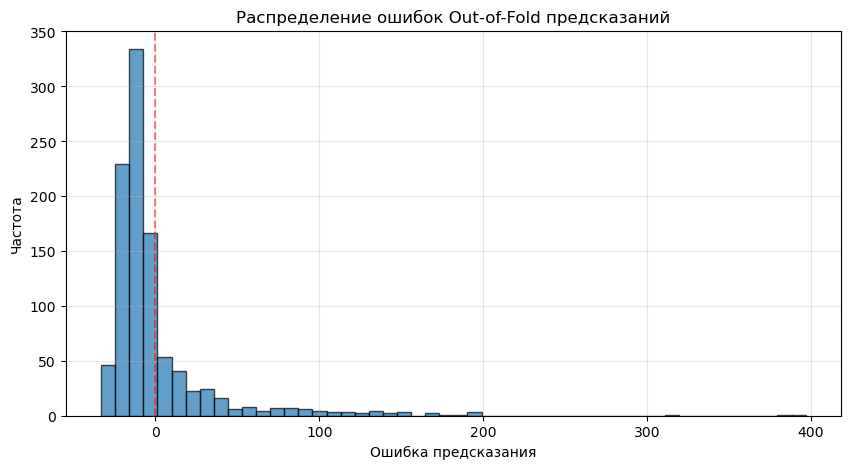


Анализ выбросов:
 Порог для выбросов: 70.41
 Количество выбросов: 50 из 1000 (5.0%)

Влияние выбросов на MSE
 MSE на всех объектах: 1414.27
 MSE без выбросов: 323.30
 Вклад выбросов в MSE: 77.1% 

----------------------------------------
Выводы:
 - Распределение ошибок имеет тяжелые хвосты - есть объекты с большими ошибками
 - Верхние 5% ошибок вносят 77.1% в общую MSE


In [18]:
# Out-of-Fold предсказания
alpha_to_use = best_alpha if 'best_alpha' in locals() else 1.0
oof_predictions = cross_val_predict(
    Ridge(alpha=alpha_to_use), 
    X_train_1000,  
    y_train_1000, 
    cv=5)

# вычисление и распределение ошибок
oof_errors = y_train_1000 - oof_predictions

plt.figure(figsize=(10, 5))
plt.hist(oof_errors, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок Out-of-Fold предсказаний')
plt.grid(alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.show()

# порог для выбросов (верхние 5% ошибок)
threshold_95 = np.percentile(np.abs(oof_errors), 95)
outlier_mask = np.abs(oof_errors) > threshold_95

print("\nАнализ выбросов:")
print(f" Порог для выбросов: {threshold_95:.2f}")
print(f" Количество выбросов: {outlier_mask.sum()} из {len(oof_errors)} ({outlier_mask.sum()/len(oof_errors)*100:.1f}%)")

# влияние выбросов на MSE
mse_total = mean_squared_error(y_train_1000, oof_predictions)
mse_no_outliers = mean_squared_error(y_train_1000[~outlier_mask], oof_predictions[~outlier_mask])

print("\nВлияние выбросов на MSE")
print(f" MSE на всех объектах: {mse_total:.2f}")
print(f" MSE без выбросов: {mse_no_outliers:.2f}")
print(f" Вклад выбросов в MSE: {(mse_total - mse_no_outliers)/mse_total*100:.1f}% \n")

# выводы
print("-" * 40)
print("Выводы:")

print(" - Распределение ошибок имеет тяжелые хвосты - есть объекты с большими ошибками")
print(f" - Верхние 5% ошибок вносят {((mse_total - mse_no_outliers)/mse_total*100):.1f}% в общую MSE")